In [1]:
# 패키지 import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [12]:
#  데이터 셋 준비
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# 훈련이미지 배열에는 60,000건의 이미지가 있고, 각 이미지는 28×28 픽셀
train_images.shape

(60000, 28, 28)

In [4]:
# 훈려라벨 배열에는 60,000건의 라벨이 있고、값은 0〜9
print(len(train_labels), train_labels)

60000 [5 0 4 ... 5 6 8]


In [5]:
# 평가이미지 배열에는 10,000건의 이미지가 있고, 각 이미지는 28×28픽셀
test_images.shape

(10000, 28, 28)

In [6]:
# 평가라벨 배열에는 10,000 건의 라벨이 있고, 값은 0〜9
print(len(test_labels), test_labels)

10000 [7 2 1 ... 4 5 6]


/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


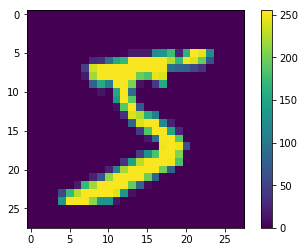

In [28]:
# 픽셀 값은 0〜255 범위
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [29]:
# 0〜255의 값을 0〜1 범위로 스케일링
train_images = train_images / 255.0
test_images = test_images / 255.0

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


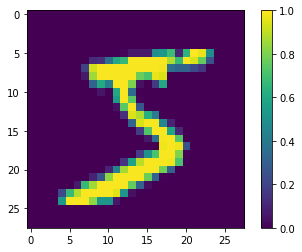

In [30]:
# 픽셀값 범위 0〜1
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [32]:
# 훈력 이미지 배열의 형태를 (60000, 28, 28)에서 (60000, 28, 28, 1)로 변환
train_images = np.reshape(train_images, [60000, 28, 28, 1])
train_images.shape

(60000, 28, 28, 1)

In [34]:
# 평가이미지 배열의 형태를 (10000, 28, 28)에서 (10000, 28, 28, 1)로 변환
test_images = np.reshape(test_images, [10000, 28, 28, 1])
test_images.shape

(10000, 28, 28, 1)

In [35]:
# 모델 구조 생셩
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)), # 입력층
    keras.layers.Dense(128, activation=tf.nn.relu), # 은닉층
    keras.layers.Dense(10, activation=tf.nn.softmax) # 출력층
])

In [36]:
# 모델 컴파일
model.compile(
    optimizer=keras.optimizers.Adam(), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [37]:
# 모델 개요 표시
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 학습
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2530 - acc: 0.9283
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1102 - acc: 0.9675
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0756 - acc: 0.9774
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0567 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0439 - acc: 0.9868


In [40]:
# 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy :', test_acc)

10000/10000 [==============================] - 0s 17us/step
Test Accuracy : 0.9781


In [41]:
# 예측
predictions = model.predict(test_images)
predictions[0]

array([1.3001598e-07, 7.9697242e-07, 1.1970530e-05, 1.1684456e-03,
       4.0459550e-10, 9.7087131e-08, 2.0591905e-12, 9.9875569e-01,
       5.5843797e-05, 6.8851064e-06], dtype=float32)

In [42]:
# 예측결과
np.argmax(predictions[0])

7

In [43]:
# 정답데이터
test_labels[0]

7

In [44]:
# 모델 보존
model.save('./image_classification.h5')

# 모델 읽어오기
new_model = keras.models.load_model('./image_classification.h5')